# Test Data Preparation

We converted the test images both to RGB format and grayscale ( dimensions (299, 299, 1)) format and evaluated the models on both.

In [1]:
'''IMPORT LIBRARIES'''
import requests
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
# import cv2

from scipy.misc import imresize
from sklearn.model_selection import train_test_split
from keras.preprocessing import image
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import random

from sklearn.utils.class_weight import compute_class_weight
from PIL import Image

from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

# os.chdir("/content/gdrive/Team Drives/AC209b_final_project/")

np.random.seed(42)

Using TensorFlow backend.


In [3]:
'''LOAD TEST AND CROSS-VALIDATION DATA'''
cv10_labels   = np.load('cv10_labels.npy')
cv10_data     = np.load('cv10_data.npy')
test10_data   = np.load('test10_data.npy')
test10_labels = np.load('test10_labels.npy')

# combine test and validation sets
test_data   = np.vstack((cv10_data,test10_data))
test_labels = np.concatenate((cv10_labels,test10_labels))
assert(test_data.shape[0] == len(test_labels))

# shuffle combined test/validation set
test_indexes = np.array(list(range(len(test_labels))))
np.random.shuffle(test_indexes)
test_data   = test_data[test_indexes]
test_labels = test_labels[test_indexes]

In [ ]:
'''Code to Convert the images to RGB i.e. 3 channels.'''
def convert_to_RGB_np(x_test):
    rgb_tensor = tf.image.grayscale_to_rgb(x_test)
    rgb_x_test = tf.Session().run(rgb_tensor)
    return rgb_x_test

In [ ]:
%%time
x_test = convert_to_RGB_np(test_data)

In [ ]:
# convert numpy images to actual images, save locally. Should take about 15 min with GPU.
for i, np_img in enumerate(x_test):
    pil_img = Image.fromarray(np_img.squeeze())
    pil_img.save(f"test_images/img{i+1}.png","PNG")

In [4]:
%%time
for i, np_img in enumerate(test_data):
    pil_img = Image.fromarray(np_img.squeeze())
    pil_img.save(f"test_images_grayscale/img{i+1}.png","PNG")

CPU times: user 4min 13s, sys: 1.62 s, total: 4min 15s
Wall time: 4min 15s


In [5]:
'''FUNCTION TO PLOT IMAGE FROM ID'''
def load_test_image(image_id, directory='./test_images/', dim=3, show=False):
    '''
    -----------------------------------------------------------------------
    Function to load image from file location and normalize between 0 and 1
    -----------------------------------------------------------------------
    Param[in] image_id .. double of image id
    Param[out] path .. string of image location
    '''
    image = Image.open(directory+image_id+'.png')
    image = list(image.getdata())
    image = np.array(image)
    image = np.reshape(image,(299,299,dim)) #We know the shape of all images are 299x299
    if show:
        plt.imshow(image[:,:,0],cmap='gray')
        plt.axis('off')
    return image/255.

In [ ]:
# This was done in previous runs of the notebook and in only included here for thoroughness.
tester_test_img_rand = load_test_image('img4000', show=True)

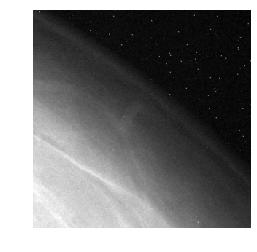

In [6]:
tester_test_img_rand = load_test_image('img4000', directory='./test_images_grayscale/', dim=1, show=True)